In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from load_data import get_data

In [4]:
x_train, y_train, x_pred = get_data()

C:\Users\gango\Projects\ADA\load_data.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  alldf = pd.concat([train_df,test_df])


Training set size: (24584, 57)


In [6]:
%%time
max_depth = range(2, 10)
param_grid = {'max_depth': max_depth}
clf = GridSearchCV(DecisionTreeClassifier(),
                   scoring='roc_auc',
                   return_train_score=True,
                   param_grid=param_grid, cv=5, n_jobs=4,
                   verbose=5)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    7.8s finished


Wall time: 8.54 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4, param_grid={'max_depth': range(2, 10)},
             pre_dispatch='2*n_jobs', ref

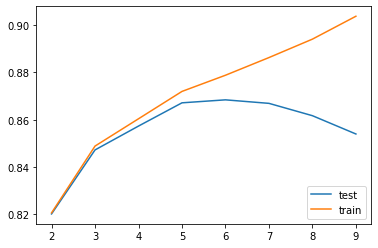

In [20]:
plt.plot(max_depth, clf.cv_results_['mean_test_score'], label='test')
plt.plot(max_depth, clf.cv_results_['mean_train_score'], label='train')
plt.legend(loc='lower right')
plt.show()